In [95]:
%load_ext autoreload
%autoreload 2

%pylab inline

import dataloaders
import models
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics 
import sklearn.cluster as cluster
import numpy as np 
import random
import classifiers
from torch.autograd import Variable
import torch
import torch.nn as nn 
import torch.optim as optim

from imblearn.under_sampling import RandomUnderSampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [96]:
filepath = '../data/bitcoinotc-cleaned.csv'
data = dataloaders.UnsplitDataset(filepath, ratio=0.8, delimiter=',')

In [97]:
num_nodes = data.get_num_nodes()
dims = 32
epochs = 200
lr = 0.1
lr_decay=0.0
weight_decay=0.0
lam = 0.00055
X_train, y_train = data.get_training_set()
X_test, y_test = data.get_testing_set()
p = 2
X = data.X
y = data.y

In [98]:
kernel_model = models.fit_pseudo_kernel_model(num_nodes, dims, X, y, epochs=epochs, p=p, 
                                              lr=lr,lr_decay=lr_decay, lam=lam, weight_decay=weight_decay, undersample=True)

The loss at epoch  1  was  0.7053217887878418
The loss at epoch  2  was  0.716903030872345
The loss at epoch  3  was  0.6471400260925293
The loss at epoch  4  was  0.5686355829238892
The loss at epoch  5  was  0.5225486159324646
The loss at epoch  6  was  0.4861900508403778
The loss at epoch  7  was  0.4697667062282562
The loss at epoch  8  was  0.4655076563358307
The loss at epoch  9  was  0.44910329580307007
The loss at epoch  10  was  0.44499629735946655
The loss at epoch  11  was  0.4240800440311432
The loss at epoch  12  was  0.4171591103076935
The loss at epoch  13  was  0.41138631105422974
The loss at epoch  14  was  0.4033437669277191
The loss at epoch  15  was  0.4011231064796448
The loss at epoch  16  was  0.39442288875579834
The loss at epoch  17  was  0.3929894268512726
The loss at epoch  18  was  0.391407310962677
The loss at epoch  19  was  0.392078161239624
The loss at epoch  20  was  0.39316093921661377
The loss at epoch  21  was  0.38404592871665955
The loss at epoch  

The loss at epoch  176  was  0.3553234338760376
The loss at epoch  177  was  0.35636284947395325
The loss at epoch  178  was  0.352608323097229
The loss at epoch  179  was  0.353789746761322
The loss at epoch  180  was  0.3525221347808838
The loss at epoch  181  was  0.35350531339645386
The loss at epoch  182  was  0.35371866822242737
The loss at epoch  183  was  0.3537866771221161
The loss at epoch  184  was  0.35560426115989685
The loss at epoch  185  was  0.35419759154319763
The loss at epoch  186  was  0.3554704189300537
The loss at epoch  187  was  0.352962464094162
The loss at epoch  188  was  0.3539564311504364
The loss at epoch  189  was  0.3516651690006256
The loss at epoch  190  was  0.3526182472705841
The loss at epoch  191  was  0.35515525937080383
The loss at epoch  192  was  0.3563203513622284
The loss at epoch  193  was  0.35328590869903564
The loss at epoch  194  was  0.3553939461708069
The loss at epoch  195  was  0.3547126352787018
The loss at epoch  196  was  0.35676

In [99]:
import community

In [100]:
clusterer, cluster_labels = community.cluster_from_model(kernel_model, min_cluster_size=10)

In [101]:
len(cluster_labels[cluster_labels == -1])

4342

In [102]:
len(cluster_labels[cluster_labels == 0])

13

In [103]:
len(cluster_labels[cluster_labels == 1])

18

In [104]:
max(cluster_labels)

21

In [105]:
len(y)

35592

In [106]:
for i in range(-1, max(cluster_labels) + 1):
    print(i, ' : ', len(cluster_labels[cluster_labels == i]))

-1  :  4342
0  :  13
1  :  18
2  :  27
3  :  12
4  :  24
5  :  18
6  :  11
7  :  11
8  :  14
9  :  18
10  :  107
11  :  15
12  :  16
13  :  11
14  :  15
15  :  14
16  :  30
17  :  12
18  :  17
19  :  11
20  :  1112
21  :  13


In [107]:
from sklearn.manifold import TSNE, MDS

In [108]:
tsne = TSNE(n_components=2)


In [109]:
vecs = kernel_model.get_all_weights()[1:]

In [110]:
transformed_vecs = tsne.fit_transform(vecs)


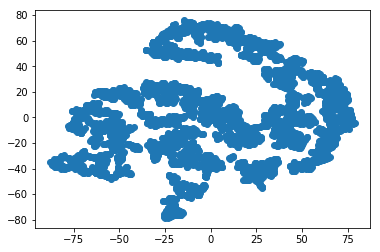

In [111]:
plt.scatter(transformed_vecs[:,0], transformed_vecs[:,1])

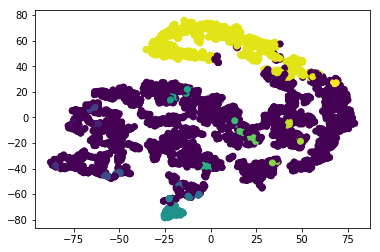

In [112]:
plt.scatter(transformed_vecs[:,0], transformed_vecs[:,1], c=cluster_labels)

In [113]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

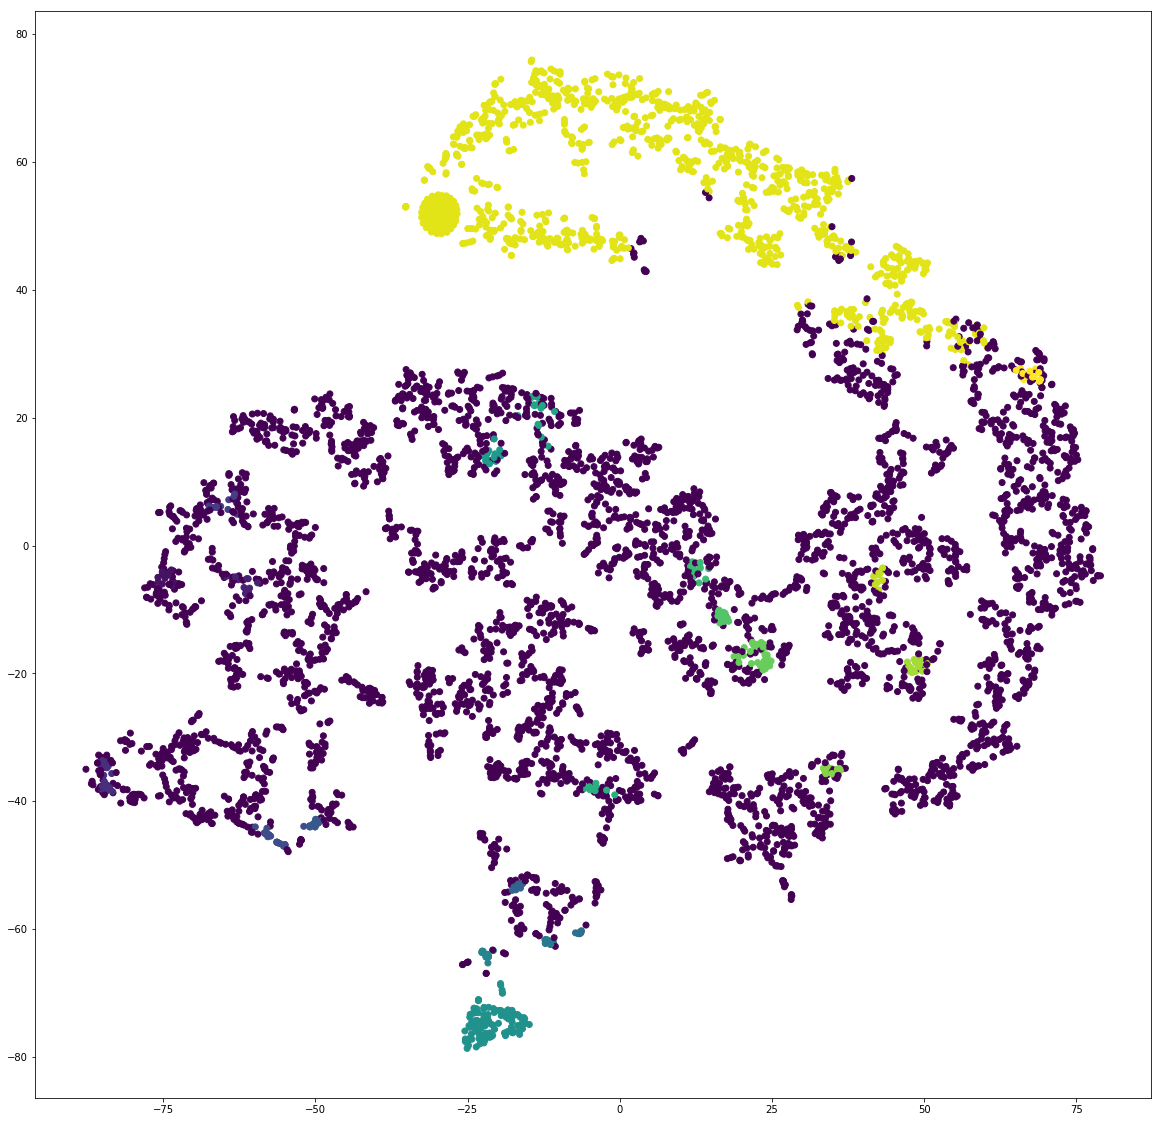

In [123]:
plt.scatter(transformed_vecs[:,0], transformed_vecs[:,1], c=cluster_labels)

In [124]:
not_noise = np.array(range(len(cluster_labels)))[cluster_labels != -1]

In [125]:
not_noise_vecs = transformed_vecs[not_noise, :]

In [126]:
not_noise_labels = cluster_labels[not_noise]

In [127]:
len(not_noise_vecs)

1539

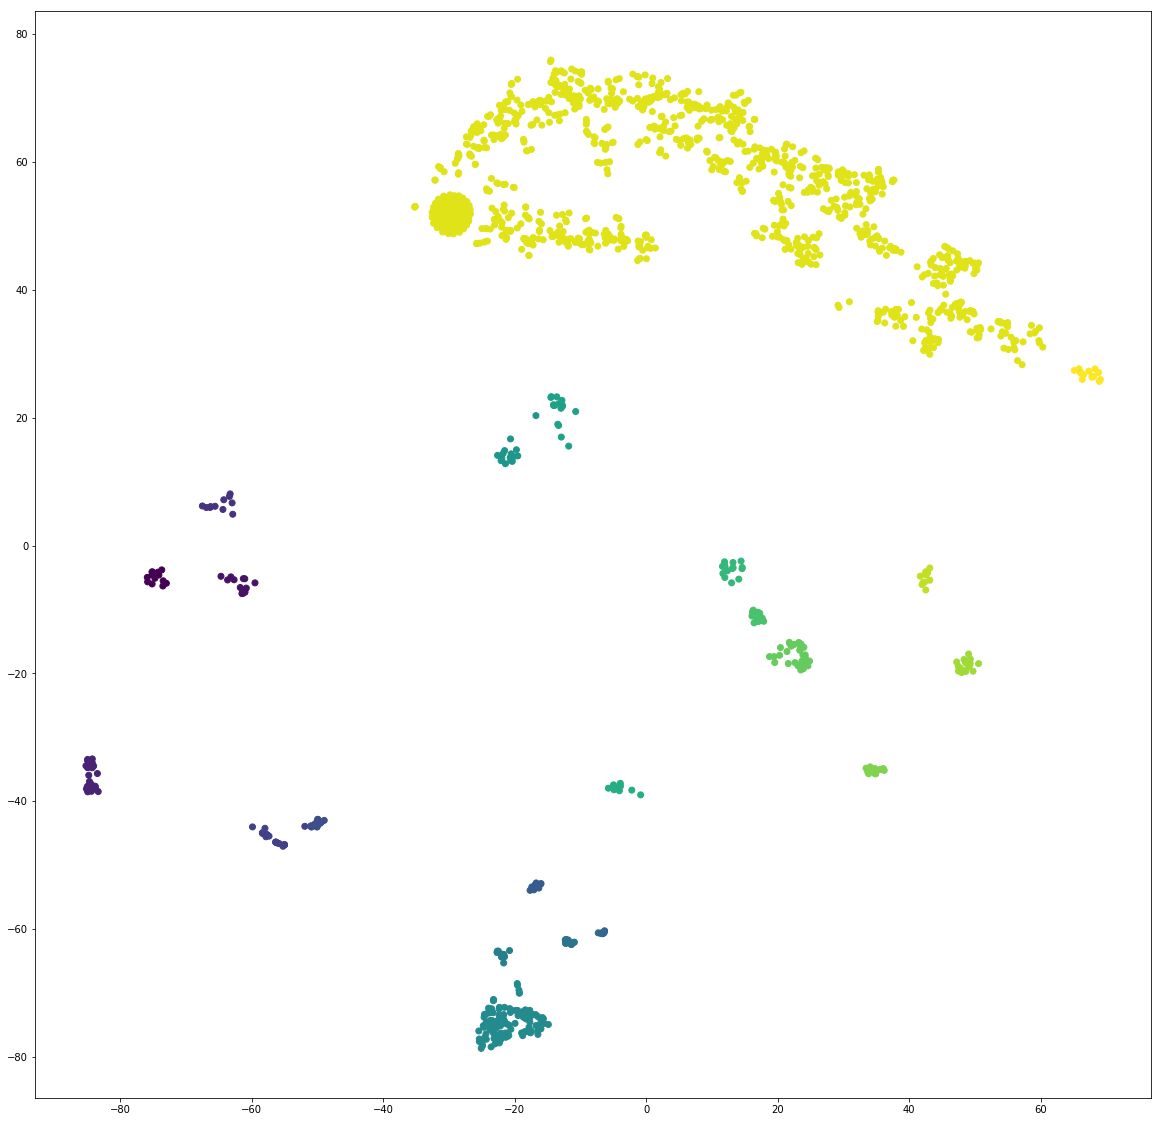

In [128]:
plt.scatter(not_noise_vecs[:,0], not_noise_vecs[:,1], c=not_noise_labels)

In [129]:
zero_cluster = np.array(range(len(cluster_labels)))[cluster_labels == 0]

In [130]:
zero_cluster

array([1096, 2607, 2608, 2708, 2805, 3165, 3270, 3567, 3898, 4469, 4884,
       5138, 5469])

In [131]:
for x in zero_cluster:
    for y in zero_cluster:
        if x != y:
            inpt_x = Variable(torch.LongTensor([int(x) + 1]))
            inpt_y = Variable(torch.LongTensor([int(y) + 1]))
            #print(inpt_x)
            print(kernel_model(inpt_x, inpt_y))

Variable containing:
 0.9776  0.0224
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9909  0.0091
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9942  0.0058
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9840  0.0160
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9751  0.0249
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9584  0.0416
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9536  0.0464
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9810  0.0190
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9916  0.0084
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9682  0.0318
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9860  0.0140
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9475  0.0525
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9933  0.0067
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9992  0.0008
[torch.FloatTensor of size 1x2]

Variable containing:

In [132]:
one_cluster = np.array(range(len(cluster_labels)))[cluster_labels == 1]

In [133]:
for x in one_cluster[:3]:
    for y in zero_cluster:
        if x != y:
            inpt_x = Variable(torch.LongTensor([int(x) + 1]))
            inpt_y = Variable(torch.LongTensor([int(y) + 1]))
            #print(inpt_x)
            print(kernel_model(inpt_x, inpt_y))

Variable containing:
 0.9989  0.0011
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9943  0.0057
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9992  0.0008
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9994  0.0006
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9972  0.0028
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9989  0.0011
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9974  0.0026
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9958  0.0042
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9871  0.0129
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9998  0.0002
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9992  0.0008
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9992  0.0008
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9957  0.0043
[torch.FloatTensor of size 1x2]

Variable containing:
 0.9998  0.0002
[torch.FloatTensor of size 1x2]

Variable containing:

In [139]:
clf = linear_model.LogisticRegression()
reports = classifiers.train_and_evaluate_classifier(clf, kernel_model, X_train, y_train, X_test, y_test,
                                                    operation='average', undersample=True, ratio=2)

Assembling training set features....
Fitting classifier model
Assembling testing set features


In [140]:
reports

{'auc': 0.87966080546537984,
 'average_percision_score': 0.98338787909043979,
 'classification_report': '             precision    recall  f1-score   support\n\n          0       0.39      0.61      0.48       723\n          1       0.95      0.89      0.92      6396\n\navg / total       0.90      0.86      0.88      7119\n',
 'confusion_matrix': array([[ 443,  280],
        [ 687, 5709]]),
 'macro_f1': 0.70003261522466498,
 'micro_f1': 0.86416631549374912}

In [134]:
mds = MDS(n_components=2, max_iter=100, n_init=1)
mds_transformed_vecs = mds.fit_transform(vecs)

ValueError: Array must be symmetric

In [92]:
mds_transformed_vecs

array([[ -7.60696952e+00,   2.04837034e+00],
       [  7.29039426e+00,   2.18655412e+00],
       [ -1.73645750e+00,   7.72647508e-01],
       ..., 
       [  1.80892698e-01,   1.70493662e-01],
       [ -1.34571525e-01,  -2.98967273e-02],
       [ -9.84608925e-02,   1.92789839e-03]])

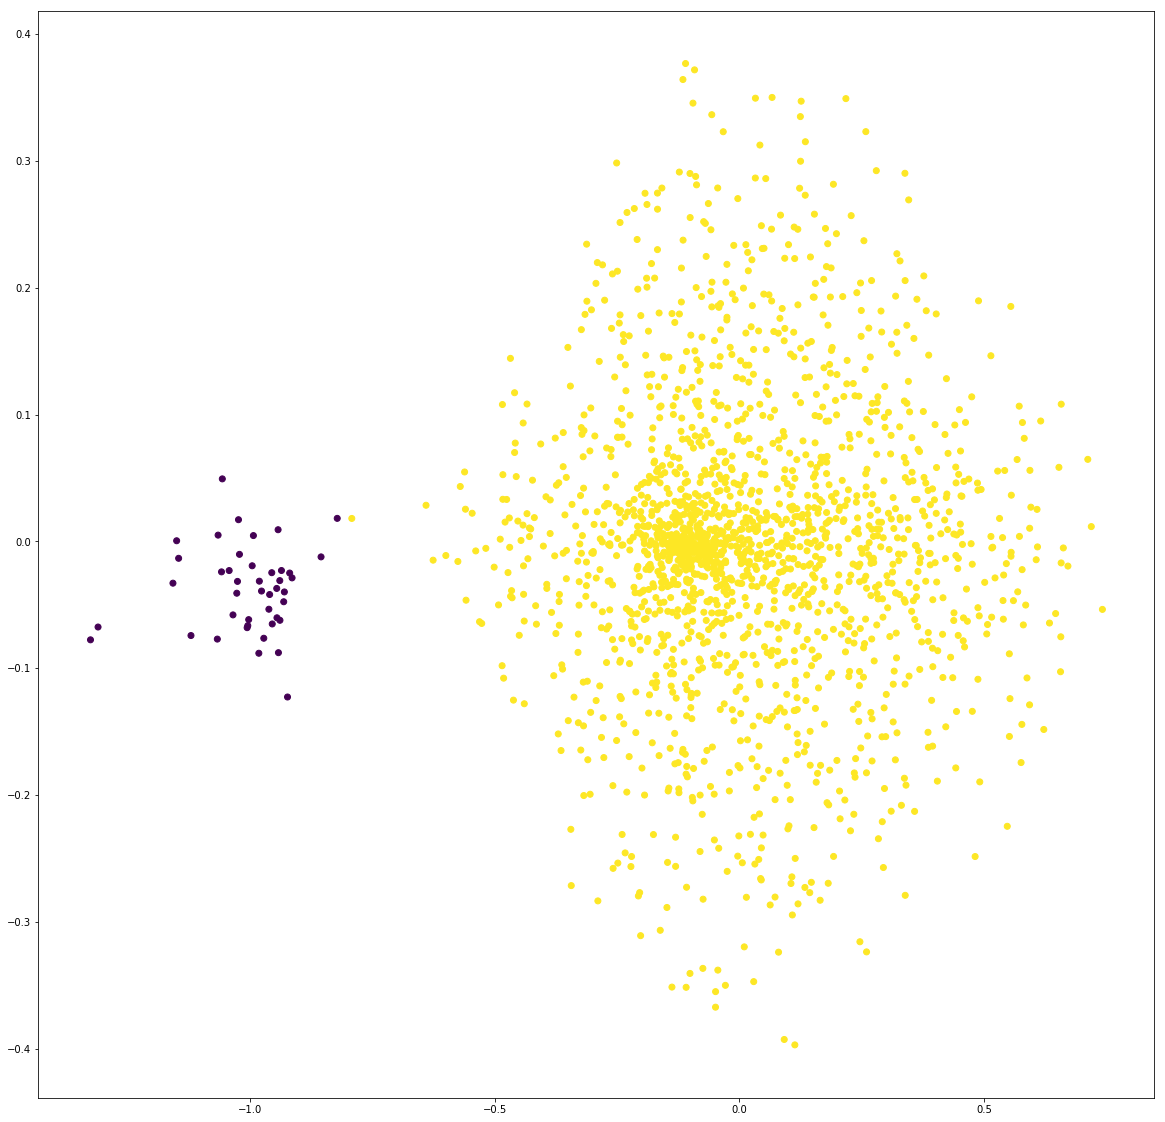

In [93]:
plt.scatter(mds_transformed_vecs[not_noise,0], mds_transformed_vecs[not_noise,1], c=not_noise_labels)